向量化的数组运算比纯python同等程度的运算要快很多。

一个简单的例子，假设我们想要评价函数`sqrt(x^2 + y^2)`。`np.meshgrid`函数取两个1维的数组，产生一个2维的矩阵，对应于所有两个数组中(x, y)的组合：

In [15]:
import numpy as np

在进行书中的内容之前，先举个例子说明meshgrid的效果。meshgrid函数用两个坐标轴上的点在平面上画网格。用法：

- `[X,Y]=meshgrid(x,y)`

- `[X,Y]=meshgrid(x)`与`[X,Y]=meshgrid(x,x)`是等同的

- `[X,Y,Z]=meshgrid(x,y,z)`生成三维数组，可用来计算三变量的函数和绘制三维立体图

这里，主要以`[X,Y]=meshgrid(x,y)`为例，来对该函数进行介绍。

`[X,Y] = meshgrid(x,y)` 将向量x和y定义的区域转换成矩阵X和Y,其中矩阵X的行向量是向量x的简单复制，而矩阵Y的列向量是向量y的简单复制(注：下面代码中X和Y均是数组，在文中统一称为矩阵了)。

假设x是长度为m的向量，y是长度为n的向量，则最终生成的矩阵X和Y的维度都是 nm （注意不是mn）。

In [5]:
m, n = (5, 3)
x = np.linspace(0, 1, m)
y = np.linspace(0, 1, n)
X, Y = np.meshgrid(x, y)
x

array([0.  , 0.25, 0.5 , 0.75, 1.  ])

In [19]:
y

array([ 0. ,  0.5,  1. ])

In [7]:
X

array([[0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ],
       [0.  , 0.25, 0.5 , 0.75, 1.  ]])

In [8]:
Y

array([[0. , 0. , 0. , 0. , 0. ],
       [0.5, 0.5, 0.5, 0.5, 0.5],
       [1. , 1. , 1. , 1. , 1. ]])

可以看到X和Y的shape都是3x5，用图的话更好理解：

[](../MarkdownPhotos/chp04/v2-a7f1c996c371d1167a0fb7b5273c6d01_r.jpg)

![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/jaa76.jpg)


把X和Y画出来后，就可以看到网格了：



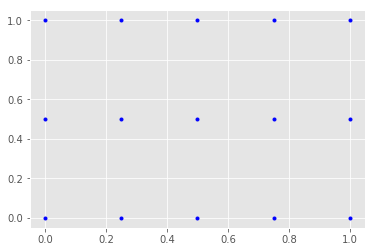

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

plt.plot(X, Y, marker='.', color='blue', linestyle='none')

可以用zip得到网格平面上坐标点的数据：

In [10]:
z = [i for i in zip(X.flat, Y.flat)]
z

[(0.0, 0.0),
 (0.25, 0.0),
 (0.5, 0.0),
 (0.75, 0.0),
 (1.0, 0.0),
 (0.0, 0.5),
 (0.25, 0.5),
 (0.5, 0.5),
 (0.75, 0.5),
 (1.0, 0.5),
 (0.0, 1.0),
 (0.25, 1.0),
 (0.5, 1.0),
 (0.75, 1.0),
 (1.0, 1.0)]

好了，下面继续进入书中的内容

In [3]:
points = np.arange(-5, 5, 0.01) # 1000 equally spaced points
xs, ys = np.meshgrid(points, points) # xs和ys是一样的
ys

array([[-5.  , -5.  , -5.  , ..., -5.  , -5.  , -5.  ],
       [-4.99, -4.99, -4.99, ..., -4.99, -4.99, -4.99],
       [-4.98, -4.98, -4.98, ..., -4.98, -4.98, -4.98],
       ..., 
       [ 4.97,  4.97,  4.97, ...,  4.97,  4.97,  4.97],
       [ 4.98,  4.98,  4.98, ...,  4.98,  4.98,  4.98],
       [ 4.99,  4.99,  4.99, ...,  4.99,  4.99,  4.99]])

In [25]:
z = np.sqrt(xs ** 2 + ys ** 2)
z

array([[ 7.07106781,  7.06400028,  7.05693985, ...,  7.04988652,
         7.05693985,  7.06400028],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       ..., 
       [ 7.04988652,  7.04279774,  7.03571603, ...,  7.0286414 ,
         7.03571603,  7.04279774],
       [ 7.05693985,  7.04985815,  7.04278354, ...,  7.03571603,
         7.04278354,  7.04985815],
       [ 7.06400028,  7.05692568,  7.04985815, ...,  7.04279774,
         7.04985815,  7.05692568]])

这里我们用matplotlib把图画出来：

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

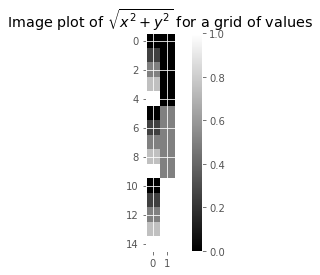

In [13]:
plt.imshow(z, cmap=plt.cm.gray); plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

# 1 Expressing Conditional Logic as Array Operations (像数组操作一样表示逻辑条件)

`numpy.where`函数是一个向量版的三相表达式，`x if condition else y`。假设我们有一个布尔数组和两个数组：

In [28]:
xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

假设如果cond中为true，我们去xarr中对应的值，否则就取yarr中的值。列表表达式的话会这么写：

In [29]:
result = [(x if c else y)
          for x, y, c in zip(xarr, yarr, cond)]

result

[1.1000000000000001, 2.2000000000000002, 1.3, 1.3999999999999999, 2.5]

这么做的话会有很多问题。首先，对于很大的数组，会比较慢。第二，对于多维数组不起作用。但`np.where`能让我们写得更简洁：

In [30]:
result = np.where(cond, xarr, yarr)
result

array([ 1.1,  2.2,  1.3,  1.4,  2.5])

`np.where`中第二个和第三个参数不用必须是数组。where在数据分析中一个典型的用法是基于一个数组，产生一个新的数组值。假设我们有一个随机数字生成的矩阵，我们想要把所有的正数变为2，所有的负数变为-2。用where的话会非常简单：

In [31]:
arr = np.random.randn(4, 4)
arr

array([[ 2.18194474,  0.15001978, -0.77191684,  0.18716397],
       [ 1.2083149 , -0.22911585,  1.30880201,  0.14197253],
       [ 0.65639111, -1.28394185,  0.65706167,  1.14277598],
       [-0.32639966, -0.26880881, -0.10225964,  0.4739671 ]])

In [32]:
arr > 0

array([[ True,  True, False,  True],
       [ True, False,  True,  True],
       [ True, False,  True,  True],
       [False, False, False,  True]], dtype=bool)

In [33]:
np.where(arr > 0, 2, -2)

array([[ 2,  2, -2,  2],
       [ 2, -2,  2,  2],
       [ 2, -2,  2,  2],
       [-2, -2, -2,  2]])

我们可以结合标量和数组。比如只把整数变为2，其他仍未原来的数字：

In [34]:
np.where(arr > 0, 2, arr) # set only positive value to 2

array([[ 2.        ,  2.        , -0.77191684,  2.        ],
       [ 2.        , -0.22911585,  2.        ,  2.        ],
       [ 2.        , -1.28394185,  2.        ,  2.        ],
       [-0.32639966, -0.26880881, -0.10225964,  2.        ]])

# 2 Mathematical and Statistical Methods (数学和统计方法)

一些能计算统计值的数学函数能基于整个数组，或者沿着一个axis（轴）。可以使用aggregations(often called reductions，汇总，或被叫做降维)，比如sum, mean, and std(标准差).

下面是一些aggregate statistics（汇总统计）：


In [35]:
arr = np.random.randn(5, 4)
arr

array([[-1.53575656, -1.39268394, -1.02284353, -1.03165049],
       [ 0.53301867,  0.50258973, -0.49389656,  0.24610963],
       [ 0.95377174, -1.57268184,  0.42969986,  1.22912566],
       [ 0.73686692, -2.82328155,  0.48018497, -1.38046692],
       [ 0.94164808,  0.19599722, -0.88779738, -0.87556277]])

In [36]:
arr.mean()

-0.33838045197794597

In [37]:
np.mean(arr)

-0.33838045197794597

In [38]:
arr.sum()

-6.767609039558919

mean, sum这样的函数能接受axis作为参数来计算统计数字，返回的结果维度更少：

In [39]:
arr.mean(axis=1)

array([-1.24573363,  0.19695537,  0.25997886, -0.74667415, -0.15642871])

In [40]:
arr.sum(axis=0)

array([ 1.62954886, -5.09006038, -1.49465263, -1.81244489])

这里`arr.mean(1)`表示，compute mean acros the columns(计算各列之间的平均值)。`arr.sum(0)`表示，compute sum down the rows(计算各行总和)。

其他一些方法，像cumsum和cumprod不做汇总，而是产生一个中间结果的数组：

In [41]:
arr = np.array([0, 1, 2, 3, 4, 5, 6, 7])
arr.cumsum()

array([ 0,  1,  3,  6, 10, 15, 21, 28])

上面的计算是一个累加的结果，`0+1=1，1+2=3，3+3=6`以此类推。

In [44]:
np.cumsum?

对于多维数组，accumulation functions（累积函数）比如cumsum，返回的是同样大小的数组，但是部分聚合会沿着指示的轴向较低维度进行切片：

In [45]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])
arr

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

In [46]:
arr.cumsum(axis=0) # 沿着行加法

array([[ 0,  1,  2],
       [ 3,  5,  7],
       [ 9, 12, 15]])

In [47]:
arr.cumprod(axis=1) # 沿着列乘法

array([[  0,   0,   0],
       [  3,  12,  60],
       [  6,  42, 336]])

这里有一些基本的统计计算方法：
![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/9mzrp.png)

# 3 Methods for Boolean Arrays（布尔数组的方法）

sum是用来计算布尔数组中有多少个true的：

In [48]:
arr = np.random.randn(100)
(arr > 0).sum() # Number of positive values

46

有两个其他方法，any和all，对于布尔数组特别有用。any检测数组中只要有一个ture返回就是true，而all检测数组中都是true才会返回true。

In [49]:
bools = np.array([False, False, True, False])

In [50]:
bools.any()

True

In [51]:
bools.all()

False

# 4 Sorting（排序）

numpy中也有sort方法：

In [16]:
np.random.randn?
# 返回符合正态分布的数值

In [17]:
arr = np.random.randn(6)
arr

array([ 0.02783181, -1.49614674,  0.37515948, -0.09537149, -0.90800298,
        0.7399105 ])

In [18]:
arr.sort()

In [19]:
arr

array([-1.49614674, -0.90800298, -0.09537149,  0.02783181,  0.37515948,
        0.7399105 ])

如果是多维数组，还可以按axis来排序：

In [20]:
arr = np.random.randn(5, 3)
arr

array([[ 1.1777869 , -0.31589631,  1.44617932],
       [ 0.52901969,  1.13245967, -0.52161602],
       [ 0.25142832, -2.08594963,  0.62638735],
       [-0.63362182,  1.84056624, -0.01170496],
       [-1.20839679, -0.60492418, -0.98093658]])

In [21]:
arr.sort(1)

In [22]:
arr

array([[-0.31589631,  1.1777869 ,  1.44617932],
       [-0.52161602,  0.52901969,  1.13245967],
       [-2.08594963,  0.25142832,  0.62638735],
       [-0.63362182, -0.01170496,  1.84056624],
       [-1.20839679, -0.98093658, -0.60492418]])

上面是直接调用数组的sort方法，会改变原有数组的顺序。但如果使用`np.sort()`函数的话，会生成一个新的排序后的结果。

一个计算分位数的快捷方法是先给数组排序，然后选择某个排名的值：

In [23]:
large_arr = np.random.randn(1000)
large_arr.sort()

In [24]:
large_arr[int(0.05 * len(large_arr))] # 5% quantile

-1.5477531069023787

# 5 Unique and Other Set Logic (单一性和其他集合逻辑)

Numpy也有一些基本的集合操作用于一维数组。`np.unique`，能返回排好序且不重复的值：

In [62]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
np.unique(names)

array(['Bob', 'Joe', 'Will'], 
      dtype='<U4')

In [63]:
ints = np.array([3, 3, 3, 2, 2, 1, 1, 4, 4])

In [64]:
np.unique(ints)

array([1, 2, 3, 4])

如果用纯python代码来实现的话，要这么写：

In [65]:
sorted(set(names))

['Bob', 'Joe', 'Will']

`np.in1d`, 测试一个数组的值是否在另一个数组里，返回一个布尔数组：

In [66]:
values = np.array([6, 0, 0, 3, 2, 5, 6])

In [67]:
np.in1d(values, [2, 3, 6])

array([ True, False, False,  True,  True, False,  True], dtype=bool)

这里是一些数组的集合操作：
![](http://oydgk2hgw.bkt.clouddn.com/pydata-book/du91n.png)